In [86]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt
from math import *

class KDE():
    
    def __init__(self, fn, band):
        self._function = fn
        self._band = band
        self._acc = .01
        self._values = [] 
        self._X = []

    def insert_data(self, data):
        self._data = data
        self._total_values = len(data)
        self._ranges = [] # [ (first non-zero range) , (second) , ...]
        self._indicator = [] # [ ordered unique values ] 
        for x in self._data:
            if x not in self._indicator:
                self._indicator.append(x)
            
        self._indicator.sort()
        self._indicator_qt = np.zeros(len(self._indicator)) # [ how many of indicator[0] appear in data, 1, ... ]
        for x in range(len(self._indicator)):
            for value in self._data:
                if self._indicator[x] == value:
                    self._indicator_qt[x] += 1

        c0 = c1 = done = 0
        while not done:
            values_in_range = [c0]
            if c1 != len(self._indicator)-1:
                while self._indicator[c1]+self._band >= self._indicator[c1+1]-self._band:
                    c1 += 1
                    values_in_range.append(c1)
                    if c1 == len(self._indicator)-1:
                        done = 1
                        break
            else:
                # pre-emptively set done to 1 since this is the last iteration possible 
                done  = 1

            lower = self._indicator[c0]-self._band
            upper = self._indicator[c1]+self._band
            Range = (lower,upper)
            self._ranges.append(Range)

            c0 = c1 = c1+1
            
        self.fn_values()
                
    def x_is_in_some_range(self, x):
        in_it = False
        for r in self._ranges:
            if (x <= r[1]) and (x >= r[0]):
                in_it = True
                break
                
        return in_it
            

    def fn_values(self):
        self._values = np.zeros(round((self._ranges[-1][1] - self._ranges[0][0])/self._acc + 1).astype(np.int64))
        self._X = np.arange(self._ranges[0][0], self._ranges[-1][1]+self._acc, self._acc)
        self._X = self._X[0:len(self._values)]        
        i = 0
        for x in self._X:
            boole = self.x_is_in_some_range(x)
            if boole:
                which_contribute = []
                for contributor_i in range(len(self._indicator)): 
                    if (self._indicator[contributor_i] <= x+self._band) and (self._indicator[contributor_i] > x-self._band):
                        which_contribute.append(contributor_i)
                        if contributor_i == len(self._indicator):
                            break

                fn_sum = 0
                for contributor in which_contribute:
                    fn_sum += self._function(x,self._indicator[contributor])*self._indicator_qt[contributor]/self._total_values
                    
                self._values[i] = fn_sum
                i += 1
            else:
                i += 1


    def show_kernel(self):
        
        plt.plot(self._X, self._values)
        plt.show()
        
    def prob_between(self, a, b):
        
        start_i = int(a/self._acc)
        end_i = int(b/self._acc)
        
        # Valid for positively valued data temporarily
        if start_i < 0:
            start_i = 0
            
        if end_i > len(self._values):
            end_i = len(self._values)-1
        
        return (.5*self._acc)*(self._values[start_i] + self._values[end_i] + 2 * sum(self._values[start_i+1:end_i]))
        
        

In [87]:
def kernel_function(x, point_mass):
    return (2/pi)*sqrt(1-(x-point_mass)**2)

def kernel_function2(x, point_mass):
    return 1/4

A = KDE(kernel_function, 1)
B = KDE(kernel_function2, 2)

def generate_data(n,a,b):
    data = np.zeros(n)
    for i in range(n):
        data[i] = rn.random()*(b-a)+a
    
    return data

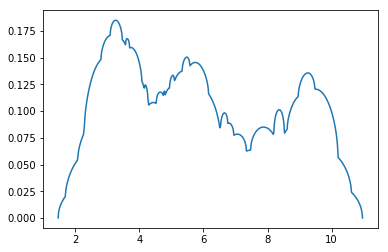

0.3846049919809918


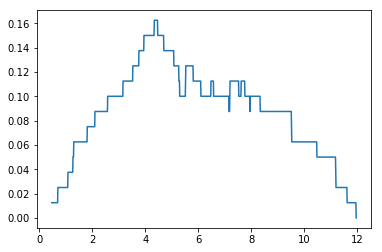

0.4669374999999996


In [88]:
data = generate_data(20,2,10)

A.insert_data(data)
A.show_kernel()
print(A.prob_between(5,10))

B.insert_data(data)
B.show_kernel()
print(B.prob_between(5,10))

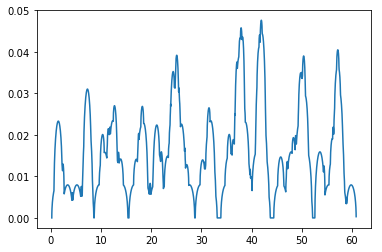

0.3626998605562482


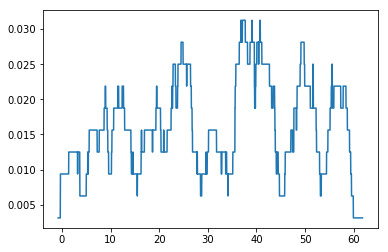

0.35624999999999424


In [89]:
data = generate_data(80,1,60)

A.insert_data(data)
A.show_kernel()
print(A.prob_between(20,40))

B.insert_data(data)
B.show_kernel()
print(B.prob_between(20,40))

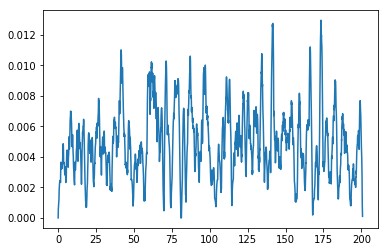

0.28303938632233805


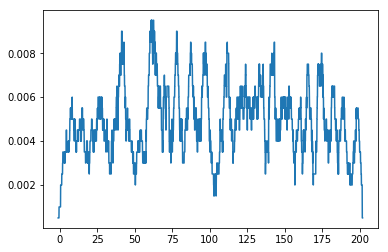

0.2791950000000069


In [90]:
data = generate_data(500,1,200)

A.insert_data(data)
A.show_kernel()
print(A.prob_between(50,100))

B.insert_data(data)
B.show_kernel()
print(B.prob_between(50,100))